Accuracy: 0.51
Confusion Matrix:
[[ 28 107]
 [ 41 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.21      0.27       135
           1       0.54      0.75      0.63       165

    accuracy                           0.51       300
   macro avg       0.47      0.48      0.45       300
weighted avg       0.48      0.51      0.47       300



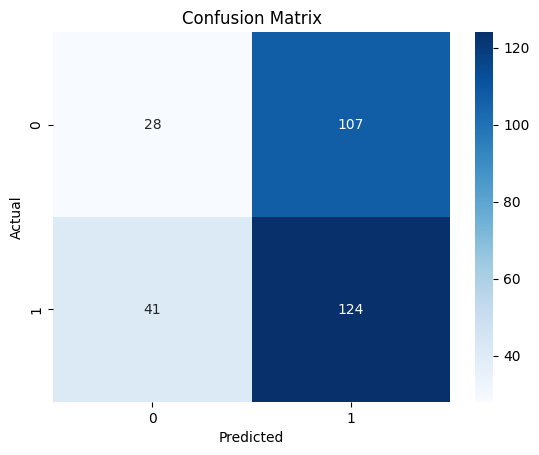

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(0)
data_size = 1000
data = {
    'Temperature': np.random.normal(20, 5, data_size),  # Average temperature of 20 with some variance
    'Humidity': np.random.normal(50, 10, data_size),    # Average humidity of 50 with some variance
    'WindSpeed': np.random.normal(10, 2, data_size),    # Average wind speed of 10 with some variance
    'Rainfall': np.random.randint(0, 2, data_size)      # Binary outcome: 0 (no rain) or 1 (rain)
}

df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['Temperature', 'Humidity', 'WindSpeed']]
y = df['Rainfall']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
